In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as gos
import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **A Gentle Introduction to the Random Walk**

How do you know your time series problem is predictable? This is a difficult question with time series forecasting. There is a tool called a random walk that can help you understand the predictability of your time series forecast problem.

In [8]:
from random import seed,randrange

seed(1)

series = [randrange(10) for i in range(1000)]
series[:10]

[2, 9, 1, 4, 1, 7, 7, 7, 6, 3]

Text(0.5, 0.98, 'Plot of a Random Series.')

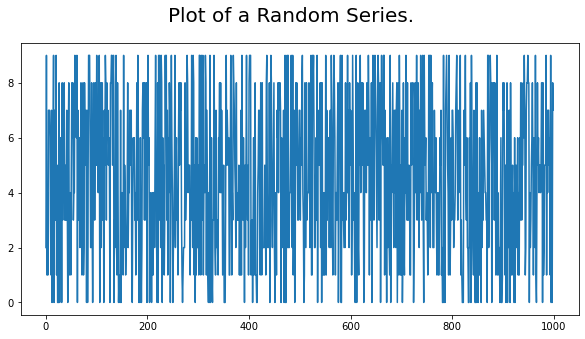

In [9]:
fig,ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=series)
fig.suptitle('Plot of a Random Series.',fontsize=20)

This is not a random walk. It is just a sequence of random numbers also called white noise
*(see Chapter 10). A common mistake that beginners make is to think that a random walk is a
list of random numbers, and this is not the case at all.*

### **Random Walk**

A random walk is different from a list of random numbers because the next value in the sequence is a modification of the previous value in the sequence. The process used to generate the series forces dependence from one-time step to the next. This dependence provides some consistency from step-to-step rather than the large jumps that a series of independent, random numbers provides. **It is this dependency that gives the process its name as a random walk or a drunkard's walk.** A simple model of a random walk is as follows:
1. Start with a random number of either -1 or 1.
2. Randomly select a -1 or 1 and add it to the observation from the previous time step.
3. Repeat step 2 for as long as you like.

More succinctly, we can describe this process as:

$\ y(t) = B_0 + B_1 * X(t - 1) + e(t) $

Where: 
- y(t) is the next value in the series. 
- B0 is a coefficient that if set to a value other than zero adds a constant drift to the random walk. 
- B1 is a coefficient to weight the previous time step and is set to 1.0. 
- X(t-1) is the observation at the previous time step. 
- e(t) is the white noise or random  fluctuation  at that time.

In [10]:
# Python Implementation

import random as rt
rt.seed(1)

# At seed(1) 
# rt.random is approx. 0.13436424411240122; first value
random_walk = []
random_walk.append(-1 if rt.random() < 0.5 else 1)

random_walk
for i in range(1,1000):
    movement = -1 if rt.random() < 0.5 else 1
    value = random_walk[i-1] + movement # index 0 of random_walk is -1, movement is 1
    random_walk.append(value)

# random_walk

In [11]:
# This explains the rt.random value above; 0.13436424411240122
# print(rt.seed(1))
# print(rt.random())

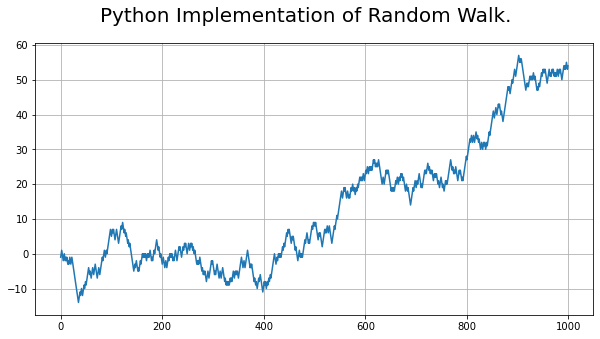

In [12]:
fig,ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=random_walk)
fig.suptitle('Python Implementation of Random Walk.',fontsize=20)
ax.grid()

**Random Walk and Autocorrelation**

We can calculate the correlation between each observation and the observations at previous time steps. A plot of these correlations is called an autocorrelation plot or a correlogram. Given the way that the random walk is constructed, we would expect a strong autocorrelation with the previous observation and a linear fall off from there with previous lag values.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

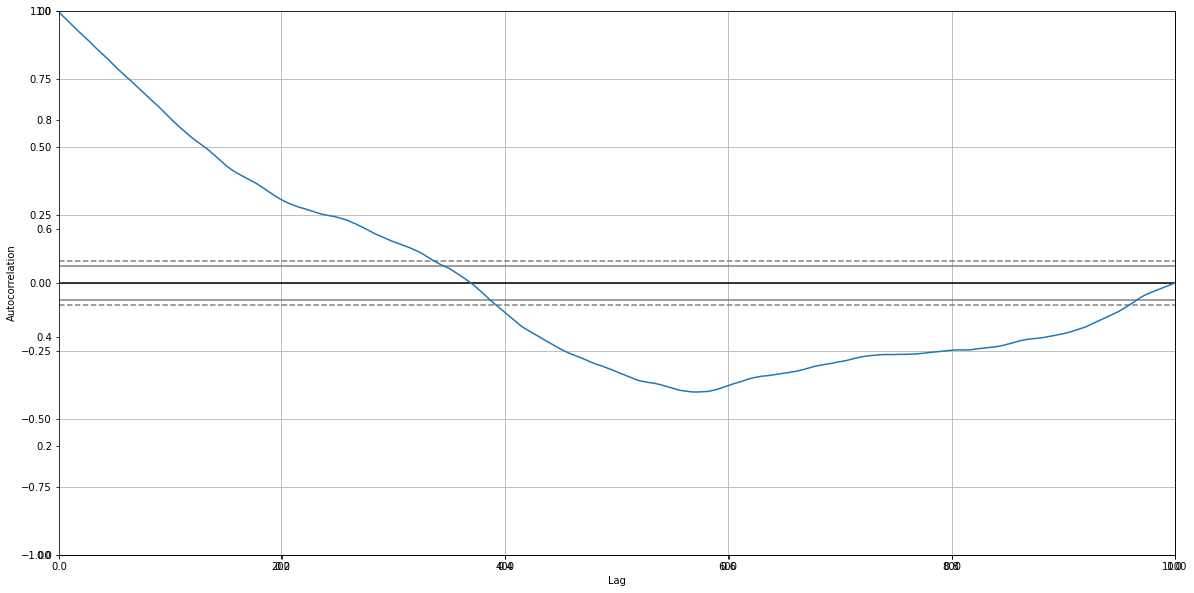

In [13]:
fig = plt.subplots(figsize=(20,10))
pd.plotting.autocorrelation_plot(random_walk)

**Random Walk and Stationarity**

A stationary time series is one where the values are not a function of time (stationarity is covered in more detail in Chapter 15). Given the way that the random walk is constructed and the results of reviewing the autocorrelation, we know that the observations in a random walk are dependent on time. The current observation is a random step from the previous observation. 

Therefore we can expect a random walk to be non-stationary. In fact, all random walk processes are non-stationary. Note that not all non-stationary time series are random walks. Additionally, a non-stationary time series does not have a consistent mean and/or variance over time. A review of the random walk line plot might suggest this to be the case. We can confirm this using a statistical significance test, specifically the Augmented Dickey-Fuller test.

In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(random_walk)
result
print(f"ADF Statistic: {np.round(result[0],6)}")
print(f"p-value: {np.round(result[1],6)}")
print(f"Critical Values: ")

for key,value in result[4].items():
    print(f"{key}: {np.round(value,6)}")

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values: 
1%: -3.436913
5%: -2.864437
10%: -2.568313


The null hypothesis of the test is that the time series is non-stationary. Running the example, we can see that the test statistic value was 0.341605. This is larger than all of the critical values at the 1%, 5%, and 10% confidence levels. Therefore, we can say that the time series does appear to be non-stationary with a low likelihood of the result being a statistical fluke.

We can make the random walk stationary by taking the first difference. That is replacing each observation as the difference between it and the previous value. Given the way that this random walk was constructed, we would expect this to result in a time series of -1 and 1 values.

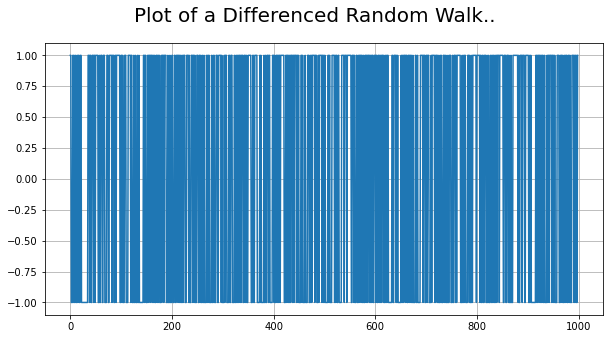

In [15]:
# Taking difference of the random_walk
diff = []
for i in range(1, len(random_walk)):
    value = random_walk[i] -random_walk[i-1]
    diff.append(value)

# Line plot
fig,ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=diff)
fig.suptitle('Plot of a Differenced Random Walk..',fontsize=20)
ax.grid()

This differnce graph also makes it clear that really we have no information to work with here other than a series of random moves. There is no structure to learn. Now that the time series is stationary, we can recalculate the correlogram of the differnced series.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

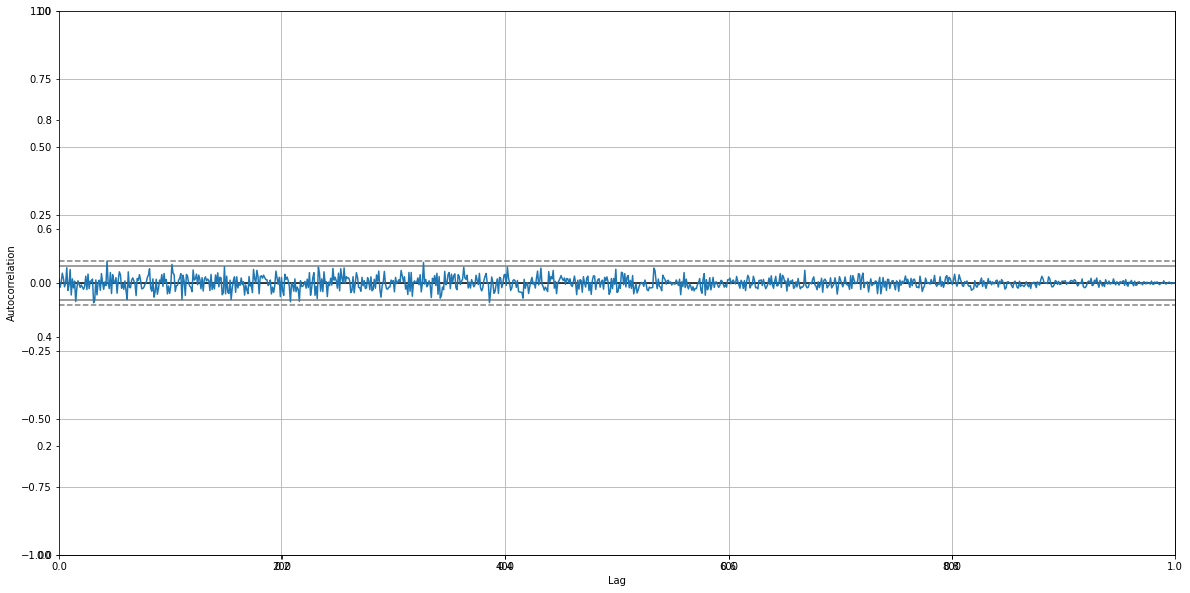

In [16]:
fig = plt.subplots(figsize=(20,10))
pd.plotting.autocorrelation_plot(diff)

Running the example, we can see no significant relationship between the lagged observations, as we would expect from the way the random walk was generated. All correlations are small, close to zero and below the 95% and 99% confidence levels (beyond a few statistical  flukes).

**Predicting a Random Walk**

**A random walk is unpredictable**; 

It cannot reasonably be predicted. Given the way that the random walk is constructed, we can expect that the best prediction we could make would be to use the observation at the previous time step as what will happen in the next time step. Simply because we know that the next time step will be a function of the prior time step. This is often called the naive forecast, or a persistence model

In [17]:
# Python Implementation

import random as rt
from sklearn.metrics import mean_squared_error

rt.seed(1)

# At seed(1) 
# rt.random is approx. 0.13436424411240122; first value
random_walk = []
random_walk.append(-1 if rt.random() < 0.5 else 1)

random_walk
for i in range(1,1000):
    movement = -1 if rt.random() < 0.5 else 1
    value = random_walk[i-1] + movement # index 0 of random_walk is -1, movement is 1
    random_walk.append(value)
# random_walk

# prepare dataset 
train_size = int(len(random_walk)* 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

# persistence 
predictions = []
history = train[-1] # 660 starting index which is 20

for i in range(len(test)):
    yhat = history # starting index 660 which is 20
    predictions.append(yhat) # append 20
    history = test[i]

rmse = mean_squared_error(test,predictions,squared=False)

# Persistence RMSE
rmse
# len(test) # 340
# train_size # 660
# len(train) # 660

1.0

Running the example estimates the RMSE of the model as 1. This too is expected, given that we know that the variation from one time step to the next is always going to be 1, either in the positive or negative direction.

Another error that beginners to the random walk make is to assume that if the range of error (variance) is known, then we can make predictions using a random walk generation type process. That is, if we know the error is either -1 or 1, then why not make predictions by adding a randomly selected -1 or 1 to the previous value.

In [18]:
# Python Implementation

import random as rt
from sklearn.metrics import mean_squared_error

rt.seed(1)

# At seed(1) 
# rt.random is approx. 0.13436424411240122; first value
random_walk = []
random_walk.append(-1 if rt.random() < 0.5 else 1)

random_walk
for i in range(1,1000):
    movement = -1 if rt.random() < 0.5 else 1
    value = random_walk[i-1] + movement # index 0 of random_walk is -1, movement is 1
    random_walk.append(value)
# random_walk

# prepare dataset 
train_size = int(len(random_walk)* 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

# persistence 
predictions = []
history = train[-1] # 660 starting index which is 20

for i in range(len(test)):
    yhat = history + (-1 if rt.random() < 0.5 else 1) # starting index 660 which is 20
    predictions.append(yhat) # append 20
    history = test[i]

rmse = np.round(mean_squared_error(test,predictions,squared=False),6)

# Random RMSE
rmse
# len(test) # 340
# train_size # 660
# len(train) # 660

1.328422

Persistence, or the naive forecast, is the best prediction we can make for a random walk time series.

**Is Your Time Series a Random Walk?**

Your time series may be a random walk. Some ways to check if your time series is a random
walk are as follows:
- The time series shows a strong temporal dependence that decays linearly or in a similar pattern.
- The time series is non-stationary and making it stationary shows no obviously learnable structure in the data.
- The persistence model provides the best source of reliable predictions.
 
This last point is key for time series forecasting. Baseline forecasts with the persistence model quickly flesh out whether you can do significantly better. If you can't, you're probably working with a random walk. Many time series are random walks, particularly those of security prices over time. The random walk hypothesis is a theory that stock market prices are a random walk and cannot be predicted. 

*A random walk is one in which future steps or directions cannot be predicted on the basis of past history. When the term is applied to the stock market, it means that short-run changes in stock prices are unpredictable.*

**The human mind sees patterns everywhere and we must be vigilant that we are not fooling
ourselves and wasting time by developing elaborate models for random walk processes.**